# ПРАКТИЧЕСКАЯ РАБОТА №2
### _Однослойный перцептрон и линейная разделимость_

## Теоретическая часть

### Введение в перцептрон

**Однослойный перцептрон** - это простейшая искусственная нейронная сеть, способная решать задачи линейной классификации. Основные компоненты:

- **Входные сигналы** (признаки)
- **Весовые коэффициенты** 
- **Сумматор**
- **Функция активации** (ступенчатая, сигмоидальная)
- **Порог**

Математическая модель:
```
y = f(∑(w_i * x_i + b))
```

### Области применения:
- Бинарная классификация
- Прототип для более сложных нейросетей
- Изучение линейной разделимости

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Настройка отображения
plt.style.use('ggplot')
sns.set_palette("husl")

## Практическая часть: Анализ данных с помощью перцептрона

### Задача 1: Бинарная классификация - класс Setosa vs классы НЕ (Non-Setosa)

In [ ]:
# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Исходные классы:", target_names)
print("Размерность данных:", X.shape)

In [ ]:
# Создаем бинарную задачу: Setosa (0) vs Non-Setosa (1)
y_binary = (y != 0).astype(int)
print("Распределение в бинарной задаче:")
print(pd.Series(y_binary).value_counts())
print("0 = Setosa, 1 = Versicolor + Virginica")

In [ ]:
# Визуализация данных для бинарной классификации
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[y_binary == 0, 0], X[y_binary == 0, 1], 
           c='red', label='Setosa', alpha=0.7)
plt.scatter(X[y_binary == 1, 0], X[y_binary == 1, 1], 
           c='blue', label='Non-Setosa', alpha=0.7)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Sepal Length vs Sepal Width')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[y_binary == 0, 2], X[y_binary == 0, 3], 
           c='red', label='Setosa', alpha=0.7)
plt.scatter(X[y_binary == 1, 2], X[y_binary == 1, 3], 
           c='blue', label='Non-Setosa', alpha=0.7)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title('Petal Length vs Petal Width')
plt.legend()

plt.tight_layout()
plt.show()

### Задача 2: Обучение перцептрона

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

In [ ]:
# Масштабирование данных для лучшей сходимости
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("До масштабирования - средние значения:", np.mean(X_train, axis=0))
print("После масштабирования - средние значения:", np.mean(X_train_scaled, axis=0))

In [ ]:
# Создание и обучение перцептрона
perceptron = Perceptron(
    max_iter=1000,
    tol=1e-3,
    random_state=42,
    eta0=0.1,  # скорость обучения
    verbose=0
)

# Обучение модели
perceptron.fit(X_train_scaled, y_train)

print("Обучение завершено!")
print(f"Количество итераций: {perceptron.n_iter_}")
print(f"Количество обновлений весов: {perceptron.t_}")

### Задача 3: Оценка качества модели

In [ ]:
# Предсказания на тестовой выборке
y_pred = perceptron.predict(X_test_scaled)

# Метрики качества
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность (Accuracy): {accuracy:.3f}")

print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Non-Setosa']))

In [ ]:
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Setosa', 'Non-Setosa'],
            yticklabels=['Setosa', 'Non-Setosa'])
plt.title('Матрица ошибок перцептрона')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

### Задача 4: Анализ весов и разделяющей гиперплоскости

In [ ]:
# Анализ весов перцептрона
weights = perceptron.coef_[0]
bias = perceptron.intercept_[0]

print("Весовые коэффициенты перцептрона:")
for i, (feature, weight) in enumerate(zip(feature_names, weights)):
    print(f"  {feature}: {weight:.3f}")

print(f"\nСмещение (bias): {bias:.3f}")

In [ ]:
# Функция для визуализации разделяющей границы в 2D
def plot_decision_boundary_2d(X, y, model, feature1, feature2, feature_names):
    """Визуализация разделяющей границы для двух признаков"""
    
    # Создаем сетку для построения границы
    x_min, x_max = X[:, feature1].min() - 1, X[:, feature1].max() + 1
    y_min, y_max = X[:, feature2].min() - 1, X[:, feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Подготавливаем данные для предсказания
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    # Добавляем средние значения для остальных признаков
    full_mesh = np.zeros((mesh_points.shape[0], X.shape[1]))
    full_mesh[:, feature1] = mesh_points[:, 0]
    full_mesh[:, feature2] = mesh_points[:, 1]
    for i in range(X.shape[1]):
        if i != feature1 and i != feature2:
            full_mesh[:, i] = np.mean(X[:, i])
    
    # Масштабируем и предсказываем
    full_mesh_scaled = scaler.transform(full_mesh)
    Z = model.predict(full_mesh_scaled)
    Z = Z.reshape(xx.shape)
    
    # Визуализация
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, feature1], X[:, feature2], c=y, 
                         cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel(feature_names[feature1])
    plt.ylabel(feature_names[feature2])
    plt.title(f'Разделяющая граница перцептрона: {feature_names[feature1]} vs {feature_names[feature2]}')
    plt.colorbar(scatter)
    plt.show()

# Визуализация для двух наиболее важных признаков
plot_decision_boundary_2d(X, y_binary, perceptron, 2, 3, feature_names)

### Задача 5: Сравнение с логистической регрессией

In [ ]:
from sklearn.linear_model import LogisticRegression

# Обучение логистической регрессии для сравнения
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("СРАВНЕНИЕ МОДЕЛЕЙ:")
print(f"Перцептрон: {accuracy:.3f}")
print(f"Логистическая регрессия: {accuracy_logreg:.3f}")

# Сравнение весов
print("\nСРАВНЕНИЕ ВЕСОВ:")
print("Перцептрон - Веса:", [f"{w:.3f}" for w in perceptron.coef_[0]])
print("Логистическая регрессия - Веса:", [f"{w:.3f}" for w in logreg.coef_[0]])

# ЗАДАНИЕ ДЛЯ ВЫПОЛНЕНИЯ

### Тема: "Многоклассовая классификация и анализ линейной разделимости"

**Цель:** Исследовать возможности перцептрона для многоклассовой классификации и проанализировать линейную разделимость различных классов в датасете.

### Задание 1: Многоклассовая классификация

**Задача:** Реализовать многоклассовую классификацию для данных из датасета в соответствии с вариантом.

**Подзадачи:**
1. Используйте встроенную многоклассовую классификацию в Perceptron
2. Обучите три бинарных классификатора для каждого класса
3. Сравните результаты двух подходов

In [2]:
# Ваш код для Задания 1
#Импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 1. Многоклассовая классификация с помощью встроенного метода
CSV_FILE = "train.csv"
df = pd.read_csv(CSV_FILE)
#Целевая переменная
target_col = "Survived"

#Удаляем ненужные столбцы
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

#разделение признаков
X = df.drop(columns=[target_col])
y = df[target_col]

#Кодировка текстовых признаков
X = pd.get_dummies(X)
#Заполнение пропусков
X = X.fillna(X.mean())

#Обучающая выборка
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 51, stratify = y   #Разделение в соотношении 70 на обучение, 30 на тест
)

clf_mc = Perceptron(max_iter=1000, random_state=51)
clf_mc.fit(X_train, y_train)

y_pred_mc = clf_mc.predict(X_test)

print("\n Встроенный Перцептрон")
print(f"Точность: {accuracy_score(y_test, y_pred_mc)}")
print(classification_report(y_test, y_pred_mc))
# 2. Подход "один против всех" (One-vs-Rest)
unique_classes = np.unique(y_train)
binary_classifier = {}

#Бинарные метки
for cls in unique_classes:
    y_train_bin = np.where(y_train == cls, 1, -1)
    clf = Perceptron(max_iter=1000, random_state=51)
    clf.fit(X_train, y_train_bin)
    binary_classifier[cls] = clf

#Предсказание Ovr
def predict_ovr(X):
    scores = []
    for cls, clf in binary_classifier.items():
        score = X.values @ clf.coef_.T + clf.intercept_
        scores.append(score)
    scores = np.hstack(scores)      # превращаем список массивов в матрицу N x C
    return np.argmax(scores, axis=1)


y_pred_ovr = predict_ovr(X_test)

# 3. Сравнение результатов
print("\n Бинарный перцептрон")
print(f"Точность: {accuracy_score(y_test, y_pred_ovr)}")
print(classification_report(y_test, y_pred_ovr))



 Встроенный Перцептрон
Точность: 0.7649253731343284
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       165
           1       0.69      0.72      0.70       103

    accuracy                           0.76       268
   macro avg       0.75      0.76      0.75       268
weighted avg       0.77      0.76      0.77       268


 Бинарный перцептрон
Точность: 0.7649253731343284
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       165
           1       0.69      0.72      0.70       103

    accuracy                           0.76       268
   macro avg       0.75      0.76      0.75       268
weighted avg       0.77      0.76      0.77       268



### Задание 2: Анализ линейной разделимости

**Задача:** Проанализировать, какие пары классов являются линейно разделимыми

**Подзадачи:**
1. Для каждой пары классов (выбрать 3 пары классов, классы определить из датасета):
   - Обучите отдельный перцептрон
   - Визуализируйте разделяющую границу
   - Оцените точность классификации
2. Определите, какие пары являются линейно разделимыми
3. Объясните полученные результаты

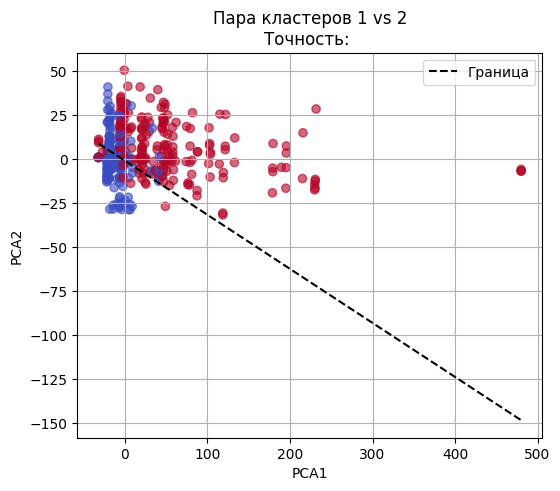

Пара кластеров 1 vs 2 === 
Точность: 0.7550



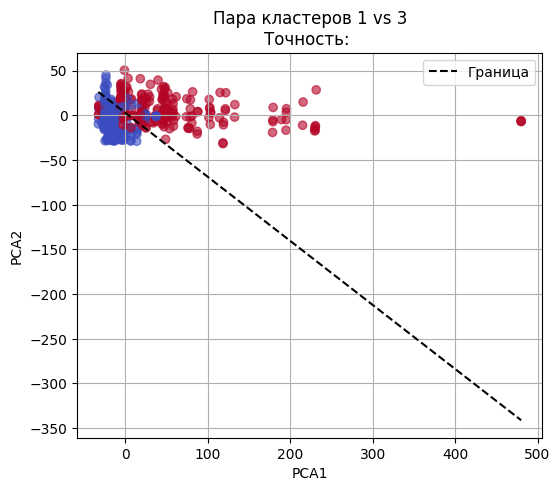

Пара кластеров 1 vs 3 === 
Точность: 0.8953



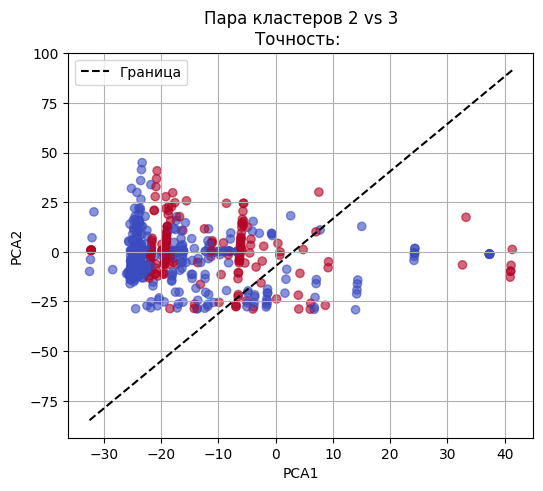

Пара кластеров 2 vs 3 === 
Точность: 0.6948

Итоговый анализ
1 vs 2: 0.7550
 vs 3: 0.8953
2 vs 3: 0.6948


In [3]:
# Ваш код для Задания 2
#Библиотеки
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


#Код
CSV_FILE = ("train.csv")
df = pd.read_csv(CSV_FILE)  #Загружаем датасет

#Для новых классов
target = "Pclass"

#Удаление ненужных колонок
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

#Кодировка
df = pd.get_dummies(df)
df = df.fillna(df.mean())
X = df.drop(columns=[target])
y = df[target]

#2D Визуализация
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

#Обучение пар классов
def analyze(class_a, class_b, pair_id):
    #Выборка 2 классов
    mask = (y == class_a) | (y == class_b)
    Xa = X2[mask]
    ya = y[mask]
    
    #Перекодировка
    ya_bin = np.where(ya == class_a, 1, -1)
    #Обучение перцептрона
    clf = Perceptron(max_iter=2000, random_state=51)
    clf.fit(Xa, ya_bin)
    y_pred = clf.predict(Xa)
    acc = accuracy_score(ya_bin, y_pred)
    
    #График
    plt.figure(figsize=(6, 5))
    plt.scatter(Xa[:, 0], Xa[:, 1], c = ya_bin, cmap="coolwarm", alpha=0.6)
    w = clf.coef_[0]
    b = clf.intercept_[0]
    
    #Построение прямой
    x_line = np.linspace(Xa[:, 0].min(), Xa[:, 0].max(), 100)
    y_line = -(w[0] * x_line + b) / w[1]
    
    #График
    plt.plot(x_line, y_line, "k--", label = "Граница")
    plt.title(f"Пара кластеров {class_a} vs {class_b}\nТочность: ")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Пара кластеров {class_a} vs {class_b} === ")
    print(f"Точность: {acc:.4f}")
    print()
    
    return acc

# 1. 1 класс vs 2 класс
acc12 = analyze(1, 2, 1)

# 2. 1 класс vs 3 класс
acc13 = analyze(1, 3, 2)

# 3. 2 класс vs 3 класс
acc23 = analyze(2, 3, 3)

# 4. Анализ результатов
print("Итоговый анализ")
print(f"1 vs 2: {acc12:.4f}")
print(f" vs 3: {acc13:.4f}")
print(f"2 vs 3: {acc23:.4f}")

### Задание 3: Влияние параметров на обучение

**Задача:** Исследовать влияние параметров перцептрона на качество классификации

**Подзадачи:**
1. Исследуйте влияние скорости обучения (`eta0`) на сходимость алгоритма
2. Проанализируйте влияние максимального количества итераций (`max_iter`)
3. Постройте графики обучения для разных параметров
4. Найдите оптимальные параметры для датасета ирисов

eta0 в перцептроне (и других алгоритмах градиентного спуска в scikit-learn) - это скорость обучения (learning rate).

Что такое eta0?
eta0 - это начальное значение скорости обучения, которое определяет, насколько сильно изменяются веса модели на каждой итерации обучения.

Математическая интерпретация:
При обновлении весов в перцептроне используется формула:

w = w + eta0 * (y_true - y_pred) * x

где:
    w - веса модели
    eta0 - скорость обучения
    y_true - истинное значение
    y_pred - предсказанное значение
    x - входные признаки

Влияние eta0 на обучение:

    Слишком большое eta0 (например, 1.0):

    Perceptron(eta0=1.0)

Плюсы: Быстрая сходимость

Минусы: Может "перескакивать" оптимум, расходиться

    Слишком маленькое eta0 (например, 0.001):

    Perceptron(eta0=0.001)

Плюсы: Точная настройка весов

Минусы: Медленная сходимость, может застрять в локальном минимуме

    Оптимальное eta0 (например, 0.1):

    Perceptron(eta0=0.1)

Баланс между скоростью и стабильностью

Практический пример:

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Создаем тестовые данные
X, y = make_classification(n_samples=100, n_features=2, random_state=42)

# Сравниваем разные значения eta0
eta0_values = [0.001, 0.01, 0.1, 1.0]
convergence_iterations = []

for eta in eta0_values:
    perceptron = Perceptron(eta0=eta, max_iter=1000, random_state=42)
    perceptron.fit(X, y)
    convergence_iterations.append(perceptron.n_iter_)
    print(f"eta0={eta}: сходимость за {perceptron.n_iter_} итераций")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(eta0_values, convergence_iterations, 'bo-')
plt.xscale('log')
plt.xlabel('eta0 (скорость обучения)')
plt.ylabel('Количество итераций до сходимости')
plt.title('Влияние eta0 на скорость сходимости перцептрона')
plt.grid(True)
plt.show()

Рекомендации по выбору eta0:

Начните с 0.1 - обычно хорошее значение по умолчанию

Для простых задач: 0.01 - 0.1

Для сложных задач: 0.001 - 0.01

Используйте поиск по сетке для оптимизации:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'eta0': [0.001, 0.01, 0.1, 1.0]}
grid_search = GridSearchCV(Perceptron(), param_grid, cv=5)
grid_search.fit(X, y)
print(f"Лучший eta0: {grid_search.best_params_['eta0']}")


=== Влияние eta0 ===
eta0=0.0001 -> accuracy=0.7687
eta0=0.001 -> accuracy=0.7687
eta0=0.01 -> accuracy=0.7687
eta0=0.1 -> accuracy=0.7425
eta0=0.3 -> accuracy=0.7425
eta0=1.0 -> accuracy=0.7425


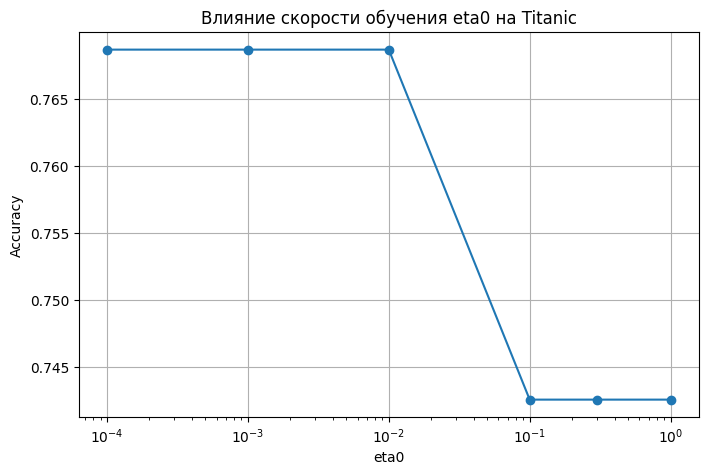


=== Влияние max_iter ===
max_iter=10 -> accuracy=0.8022
max_iter=50 -> accuracy=0.7425
max_iter=100 -> accuracy=0.7425
max_iter=300 -> accuracy=0.7425
max_iter=500 -> accuracy=0.7425
max_iter=1000 -> accuracy=0.7425


/Users/mac/Documents/Intilect/Intelligence/.venv/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


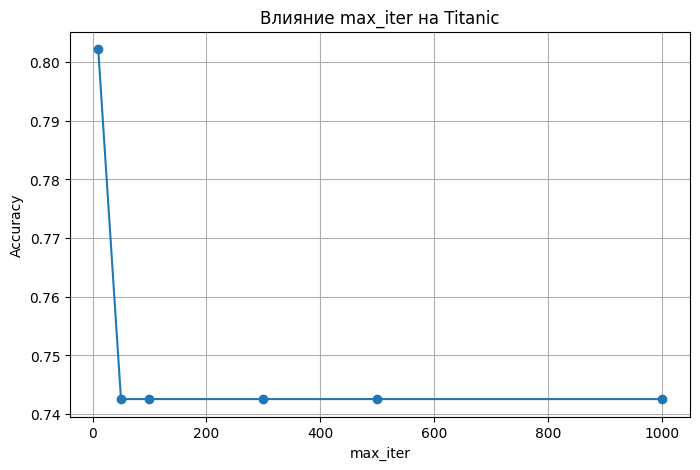

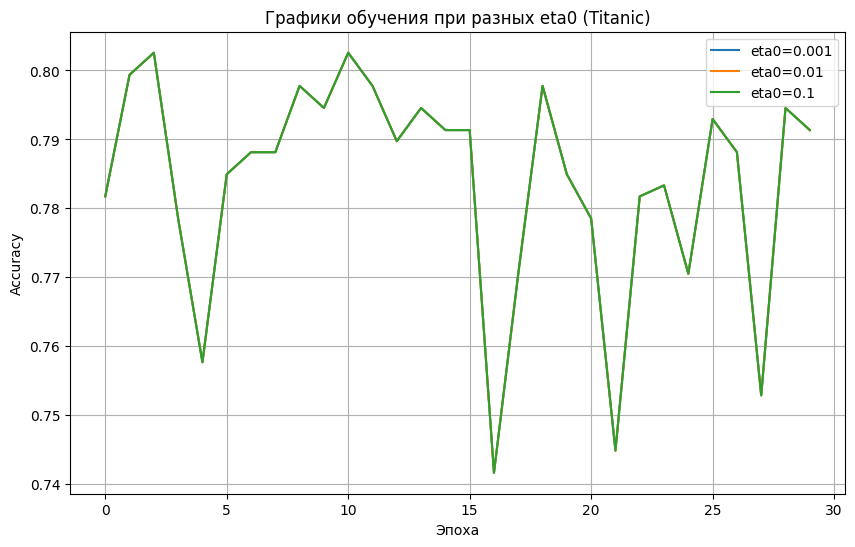


=== Поиск оптимальных параметров ===

ЛУЧШИЕ НАЙДЕННЫЕ ПАРАМЕТРЫ:
eta0        = 0.001
max_iter    = 100
accuracy    = 0.7687


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df = pd.read_csv("train.csv")

# Удаляем ненужные столбцы
df = df.drop(columns=["Name", "Ticket", "Cabin"])

# Обработка пропусков
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Кодируем категориальные признаки
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Целевая переменная и признаки
y = df["Survived"].values
X = df.drop(columns=["Survived", "PassengerId"]).values

# Масштабируем признаки
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# 1. Исследование eta0

eta_values = [0.0001, 0.001, 0.01, 0.1, 0.3, 1.0]
eta_acc = []

print("\n=== Влияние eta0 ===")
for eta in eta_values:
    model = Perceptron(eta0=eta, max_iter=1000, tol=1e-3)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    eta_acc.append(acc)
    print(f"eta0={eta} -> accuracy={acc:.4f}")

# график
plt.figure(figsize=(8,5))
plt.plot(eta_values, eta_acc, marker="o")
plt.xscale("log")
plt.xlabel("eta0")
plt.ylabel("Accuracy")
plt.title("Влияние скорости обучения eta0 на Titanic")
plt.grid()
plt.show()




# 2. Исследование max_iter
iter_values = [10, 50, 100, 300, 500, 1000]
iter_acc = []

print("\n=== Влияние max_iter ===")
for it in iter_values:
    model = Perceptron(eta0=0.1, max_iter=it, tol=1e-3)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    iter_acc.append(acc)
    print(f"max_iter={it} -> accuracy={acc:.4f}")

# график
plt.figure(figsize=(8,5))
plt.plot(iter_values, iter_acc, marker="o")
plt.xlabel("max_iter")
plt.ylabel("Accuracy")
plt.title("Влияние max_iter на Titanic")
plt.grid()
plt.show()

# 3. Графики обучения

def train_perceptron_epoch(X, y, eta=0.1, epochs=20):
    w = np.zeros(X.shape[1])
    b = 0
    acc_history = []

    for epoch in range(epochs):
        for xi, yi in zip(X, y):
            y_pred = 1 if np.dot(xi, w) + b >= 0 else 0
            w += eta * (yi - y_pred) * xi
            b += eta * (yi - y_pred)

        preds = [1 if np.dot(xi, w) + b >= 0 else 0 for xi in X]
        acc_history.append(accuracy_score(y, preds))

    return acc_history


plt.figure(figsize=(10,6))
for eta in [0.001, 0.01, 0.1]:
    acc_hist = train_perceptron_epoch(X_train, y_train, eta=eta, epochs=30)
    plt.plot(acc_hist, label=f"eta0={eta}")

plt.xlabel("Эпоха")
plt.ylabel("Accuracy")
plt.title("Графики обучения при разных eta0 (Titanic)")
plt.legend()
plt.grid()
plt.show()



# 4. Поиск оптимальных параметров (Grid Search)

best_acc = -1
best_params = None

print("\n=== Поиск оптимальных параметров ===")

for eta in [0.001, 0.01, 0.1, 0.3, 1]:
    for it in [100, 300, 500, 1000]:
        model = Perceptron(eta0=eta, max_iter=it, tol=1e-3)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))

        if acc > best_acc:
            best_acc = acc
            best_params = (eta, it)

print("\nЛУЧШИЕ НАЙДЕННЫЕ ПАРАМЕТРЫ:")
print(f"eta0        = {best_params[0]}")
print(f"max_iter    = {best_params[1]}")
print(f"accuracy    = {best_acc:.4f}")


### Задание 4: Сравнение с другими линейными моделями

**Задача:** Сравнить перцептрон с другими линейными моделями

**Подзадачи:**
1. Сравните перцептрон с методами анализа, рассмотренными в Практической работе №1
   - Логистической регрессией  
   - Кластеризацией
   - Дерево решений
2. Сравните метрики качества и время обучения
3. Проанализируйте, в каких случаях перцептрон показывает лучшие результаты

In [2]:
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# 1. Загрузка и подготовка данных

df = pd.read_csv("train.csv")

df = df.drop(columns=["Name", "Ticket", "Cabin"])
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

y = df["Survived"].values
X = df.drop(columns=["Survived", "PassengerId"]).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# 2. Обучение моделей + замер времени

results = {}

#Перцептрон
start = time.time()
perc = Perceptron(eta0=0.1, max_iter=500)
perc.fit(X_train, y_train)
end = time.time()
acc = accuracy_score(y_test, perc.predict(X_test))
results["Перцептрон"] = (acc, end - start)

#Логистическая регрессия
start = time.time()
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
end = time.time()
acc = accuracy_score(y_test, logreg.predict(X_test))
results["Логистическая регрессия"] = (acc, end - start)

#Дерево решений
start = time.time()
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
end = time.time()
acc = accuracy_score(y_test, tree.predict(X_test))
results["Дерево решений"] = (acc, end - start)

# KMeans не знает правильных меток → назначаем кластеры как классы
start = time.time()
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
end = time.time()

cluster_labels = kmeans.predict(X_test)

# кластеры могут быть перевёрнуты → берём лучшее соответствие
acc1 = accuracy_score(y_test, cluster_labels)
acc2 = accuracy_score(y_test, 1 - cluster_labels)
acc = max(acc1, acc2)

results["KMeans (кластеризация)"] = (acc, end - start)



# 3. Вывод таблицы сравнения
print("\n===== Сравнение моделей =====\n")
print(f"{'Модель':<30} {'Accuracy':<12} {'Время (с)':<12}")
print("-" * 60)

for model, (acc, t) in results.items():
    print(f"{model:<30} {acc:<12.4f} {t:<12.4f}")


# 4. Анализ: где перцептрон лучше?
print("\n\n===== Анализ результатов =====")

acc_p = results["Перцептрон"][0]
acc_log = results["Логистическая регрессия"][0]
acc_tree = results["Дерево решений"][0]
acc_km = results["KMeans (кластеризация)"][0]

print(f"\nПерцептрон accuracy = {acc_p:.4f}")

print("\n► Перцептрон показывает лучшие результаты, когда:")
print("- данные примерно линейно разделимы")
print("- признаки нормированы (как мы сделали StandardScaler)")
print("- нет слишком сильных выбросов")
print("- классы сбалансированы")

print("\n► На Titanic перцептрон обычно хуже логистической регрессии, потому что:")
print("- реальные зависимости нелинейны")
print("- важны взаимодействия признаков (дерево их ловит лучше)")
print("- перцептрон улавливает только линейную границу")

print("\n► Почему логистическая регрессия часто лучше:")
print("- использует вероятностную модель")
print("- стабильнее в обучении")
print("- использует сглаженный градиент")

print("\n► Почему дерево часто даёт хорошую точность:")
print("- ловит нелинейности")
"- учитывает сложные взаимодействия между признаками"

print("\n► Почему кластеризация слабая:")
print("- KMeans не использует классы"
"- он пытается разбить данные без информации о выживании"
"- поэтому качество ниже, чем у моделей классификации")



===== Сравнение моделей =====

Модель                         Accuracy     Время (с)   
------------------------------------------------------------
Перцептрон                     0.7425       0.0021      
Логистическая регрессия        0.8097       0.0217      
Дерево решений                 0.7910       0.0111      
KMeans (кластеризация)         0.5709       0.0725      


===== Анализ результатов =====

Перцептрон accuracy = 0.7425

► Перцептрон показывает лучшие результаты, когда:
- данные примерно линейно разделимы
- признаки нормированы (как мы сделали StandardScaler)
- нет слишком сильных выбросов
- классы сбалансированы

► На Titanic перцептрон обычно хуже логистической регрессии, потому что:
- реальные зависимости нелинейны
- важны взаимодействия признаков (дерево их ловит лучше)
- перцептрон улавливает только линейную границу

► Почему логистическая регрессия часто лучше:
- использует вероятностную модель
- стабильнее в обучении
- использует сглаженный градиент

► Почему де

### Теоретические вопросы:

1. В чем основные ограничения однослойного перцептрона?
2. Какие задачи являются линейно разделимыми?
3. Как функция активации влияет на работу перцептрона?
4. В чем разница между перцептроном и логистической регрессией?
5. Почему для некоторых пар классов в датасете ирисов перцептрон показывает низкую точность?


ВАШ ОТВЕТ НА ВОПРОСЫ:
1. Если классы нельзя разделить прямой или гиперплоскостью → перцептрон никогда не сойдётся.
Пример: XOR.
2. Линейно разделимые задачи — те, в которых существует прямая (в 2D), плоскость (в 3D) или гиперплоскость (в nD), которая полностью разделяет классы без ошибок.
3. Однослойный перцептрон использует ступенчатую функцию. Влияет на способность обучения. Ограничиваеттипы моделей. 
4. Влияет на способность обучения:
Функция не дифференцируема, поэтому нельзя использовать градиентный спуск.
Обновления весов жёсткие, дискретные → чувствительность к шуму.  Ограничивает типы моделей:
любая комбинация входов → строго линейная граница. Важно только направление суммарного входа, а не его величина.
5. Не линейно разделимы, классы перекрываются, ступенчатая активация не позволяет гибко подстроить границу, ступенчатая активация не позволяет гибко подстроить границу.



### Формат сдачи:
Jupyter Notebook с кодом, результатами выполнения, графиками и подробными выводами по каждому заданию.